In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Read
+ This is the same project as the catboost classifier with the same dataset, however, this time I will be keeping ALL attributes
+ Instead of removing Age and diabetes like the other jupyter notebook file under this respository
+ This will show the importance of cleaning datasets before running models
+ Also show the importance of comparing models rather than just sticking with one

In [3]:
df = pd.read_csv("Documents/heart_fail.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
df.rename(columns = {'DEATH_EVENT': 'Class'}, inplace = True)

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'Class'],
      dtype='object')

In [11]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Class
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [18]:
df['Class'].value_counts()

0    203
1     96
Name: Class, dtype: int64

<AxesSubplot:>

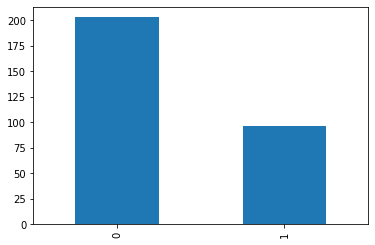

In [19]:
df['Class'].value_counts().plot(kind = 'bar')

In [20]:
corr = df.corr()

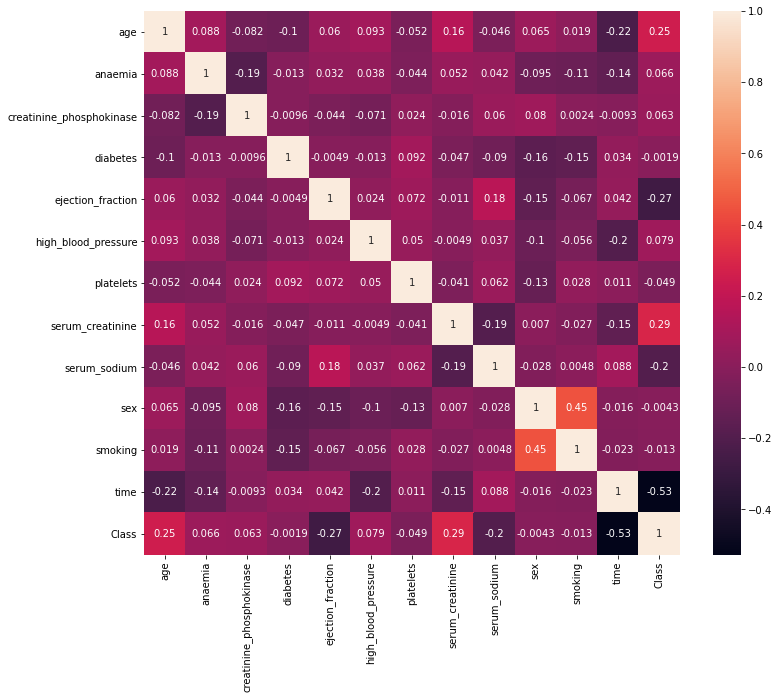

In [22]:
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cbar = True)
plt.show()

## So far
+ Everything is the same as last time
+ But this time I will not get rid of any values and see which model pycaret would like me to use
+ Then compare results with the catboost algorithm which can be found in the same respository

In [23]:
import pycaret.classification as pc

In [24]:
dir(pc)

['Any',
 'Dict',
 'Display',
 'List',
 'MLUsecase',
 'Optional',
 'Tuple',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_metric',
 'automl',
 'blend_models',
 'calibrate_model',
 'compare_models',
 'create_model',
 'deploy_model',
 'enable_colab',
 'ensemble_model',
 'evaluate_model',
 'finalize_model',
 'get_config',
 'get_logs',
 'get_metrics',
 'interpret_model',
 'io',
 'is_in_colab',
 'load_config',
 'load_model',
 'models',
 'np',
 'optimize_threshold',
 'pd',
 'plot_model',
 'predict_model',
 'pull',
 'pycaret',
 'remove_metric',
 'save_config',
 'save_model',
 'set_config',
 'setup',
 'stack_models',
 'traceback',
 'tune_model',
 'warnings']

In [25]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [26]:
cld = pc.setup(df, target = 'Class')

,Description,Value
0,session_id,5436
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(299, 13)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [27]:
pc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8474,0.8977,0.6857,0.8136,0.7215,0.6193,0.6395,0.1160
catboost,CatBoost Classifier,0.8474,0.8896,0.6833,0.8029,0.7157,0.6148,0.6340,1.2050
xgboost,Extreme Gradient Boosting,0.8326,0.8785,0.6548,0.7817,0.6984,0.5848,0.6002,0.1130
lightgbm,Light Gradient Boosting Machine,0.8281,0.8580,0.6690,0.7639,0.6919,0.5753,0.5920,0.0300
ridge,Ridge Classifier,0.8279,0.0000,0.6762,0.7635,0.7064,0.5858,0.5957,0.0120
lr,Logistic Regression,0.8236,0.8593,0.6214,0.7950,0.6740,0.5573,0.5812,0.7980
lda,Linear Discriminant Analysis,0.8183,0.8768,0.6762,0.7260,0.6927,0.5646,0.5713,0.0210
gbc,Gradient Boosting Classifier,0.8138,0.8443,0.7000,0.7342,0.6888,0.5585,0.5794,0.0430
ada,Ada Boost Classifier,0.8043,0.8311,0.6548,0.6971,0.6639,0.5267,0.5353,0.0480
nb,Naive Bayes,0.7848,0.8538,0.4571,0.7421,0.5559,0.4283,0.4541,0.0100


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5436, verbose=0,
                       warm_start=False)

## Interesting
+ Catboost has the same accuracy of Random Forest with 0.8474
+ Yet RF has a higher score on everything else except recall which the lower ranking GBC

## Tuning the Models now
+ First RF
+ Then Catboost

In [28]:
RF = pc.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9556,0.6667,0.8000,0.7273,0.6316,0.6364
1,0.8095,0.7333,0.5000,0.7500,0.6000,0.4815,0.4985
2,0.8095,0.9111,0.3333,1.0000,0.5000,0.4167,0.5130
3,0.7619,0.8222,0.5000,0.6000,0.5455,0.3860,0.3889
4,0.7143,0.8673,0.5714,0.5714,0.5714,0.3571,0.3571
5,0.9048,0.9031,0.7143,1.0000,0.8333,0.7692,0.7906
6,0.8571,0.8622,1.0000,0.7000,0.8235,0.7097,0.7416
7,0.9048,0.9796,0.8571,0.8571,0.8571,0.7857,0.7857
8,0.9048,0.9541,0.7143,1.0000,0.8333,0.7692,0.7906
9,0.9500,0.9881,1.0000,0.8571,0.9231,0.8864,0.8921


In [29]:
Tuned_RF = pc.tune_model(RF)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9048,0.9556,0.8333,0.8333,0.8333,0.7667,0.7667
1,0.7619,0.8000,0.5000,0.6000,0.5455,0.3860,0.3889
2,0.8571,0.9000,0.5000,1.0000,0.6667,0.5882,0.6455
3,0.7143,0.8000,0.3333,0.5000,0.4000,0.2222,0.2301
4,0.8095,0.8878,0.8571,0.6667,0.7500,0.6000,0.6124
5,0.9048,0.9184,0.7143,1.0000,0.8333,0.7692,0.7906
6,0.8571,0.8878,1.0000,0.7000,0.8235,0.7097,0.7416
7,0.9048,0.9694,0.8571,0.8571,0.8571,0.7857,0.7857
8,0.9524,0.8878,0.8571,1.0000,0.9231,0.8889,0.8944
9,0.9500,0.9643,1.0000,0.8571,0.9231,0.8864,0.8921


In [30]:
Cat = pc.create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9444,0.6667,0.8000,0.7273,0.6316,0.6364
1,0.7619,0.7556,0.5000,0.6000,0.5455,0.3860,0.3889
2,0.8095,0.9222,0.3333,1.0000,0.5000,0.4167,0.5130
3,0.7143,0.7667,0.3333,0.5000,0.4000,0.2222,0.2301
4,0.8095,0.8571,0.7143,0.7143,0.7143,0.5714,0.5714
5,0.9048,0.9184,0.7143,1.0000,0.8333,0.7692,0.7906
6,0.8571,0.8469,1.0000,0.7000,0.8235,0.7097,0.7416
7,0.9048,0.9694,0.8571,0.8571,0.8571,0.7857,0.7857
8,0.9048,0.9388,0.7143,1.0000,0.8333,0.7692,0.7906
9,0.9500,0.9762,1.0000,0.8571,0.9231,0.8864,0.8921


In [31]:
Tuned_cat = pc.tune_model(Cat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9444,0.6667,0.8000,0.7273,0.6316,0.6364
1,0.8095,0.7667,0.5000,0.7500,0.6000,0.4815,0.4985
2,0.8095,0.8667,0.3333,1.0000,0.5000,0.4167,0.5130
3,0.7143,0.7333,0.5000,0.5000,0.5000,0.3000,0.3000
4,0.8095,0.8367,0.7143,0.7143,0.7143,0.5714,0.5714
5,0.9048,0.8878,0.7143,1.0000,0.8333,0.7692,0.7906
6,0.8571,0.8980,1.0000,0.7000,0.8235,0.7097,0.7416
7,0.9524,0.9490,0.8571,1.0000,0.9231,0.8889,0.8944
8,0.9048,0.9082,0.7143,1.0000,0.8333,0.7692,0.7906
9,0.9500,1.0000,1.0000,0.8571,0.9231,0.8864,0.8921


## After Tuning
+ Before Tuning, both RF and Catboost had the same accuracy of 0.8474
+ Now RF has an accuracy of 0.8617 after tuning
+ Now Catboost has an accuracy of 0.8569 after tuning

In [32]:
print(Tuned_RF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.005,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=-1, oob_score=False,
                       random_state=5436, verbose=0, warm_start=False)


In [33]:
print(Tuned_cat)

### Now to Optimize Accyracy for both Models

In [34]:
Tuned_RF_Op = pc.tune_model(RF, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9048,0.9556,0.8333,0.8333,0.8333,0.7667,0.7667
1,0.7619,0.8000,0.5000,0.6000,0.5455,0.3860,0.3889
2,0.8571,0.9000,0.5000,1.0000,0.6667,0.5882,0.6455
3,0.7143,0.8000,0.3333,0.5000,0.4000,0.2222,0.2301
4,0.8095,0.8878,0.8571,0.6667,0.7500,0.6000,0.6124
5,0.9048,0.9184,0.7143,1.0000,0.8333,0.7692,0.7906
6,0.8571,0.8878,1.0000,0.7000,0.8235,0.7097,0.7416
7,0.9048,0.9694,0.8571,0.8571,0.8571,0.7857,0.7857
8,0.9524,0.8878,0.8571,1.0000,0.9231,0.8889,0.8944
9,0.9500,0.9643,1.0000,0.8571,0.9231,0.8864,0.8921


In [35]:
Tuned_Cat_Op = pc.tune_model(Cat, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9444,0.6667,0.8000,0.7273,0.6316,0.6364
1,0.8095,0.7667,0.5000,0.7500,0.6000,0.4815,0.4985
2,0.8095,0.8667,0.3333,1.0000,0.5000,0.4167,0.5130
3,0.7143,0.7333,0.5000,0.5000,0.5000,0.3000,0.3000
4,0.8095,0.8367,0.7143,0.7143,0.7143,0.5714,0.5714
5,0.9048,0.8878,0.7143,1.0000,0.8333,0.7692,0.7906
6,0.8571,0.8980,1.0000,0.7000,0.8235,0.7097,0.7416
7,0.9524,0.9490,0.8571,1.0000,0.9231,0.8889,0.8944
8,0.9048,0.9082,0.7143,1.0000,0.8333,0.7692,0.7906
9,0.9500,1.0000,1.0000,0.8571,0.9231,0.8864,0.8921


# Evaluating Random Forest

In [38]:
pc.evaluate_model(Tuned_RF_Op)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

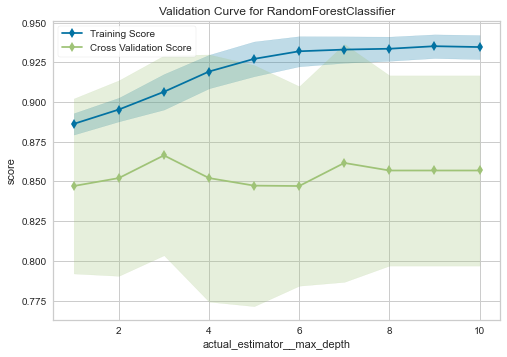

In [52]:
pc.plot_model(Tuned_RF_Op, plot = 'vc')

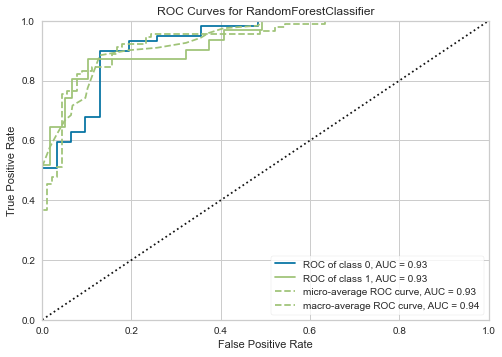

In [39]:
pc.plot_model(Tuned_RF_Op)

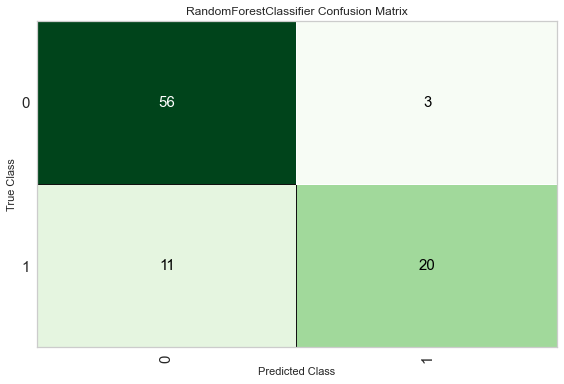

In [41]:
pc.plot_model(Tuned_RF_Op, plot = 'confusion_matrix')

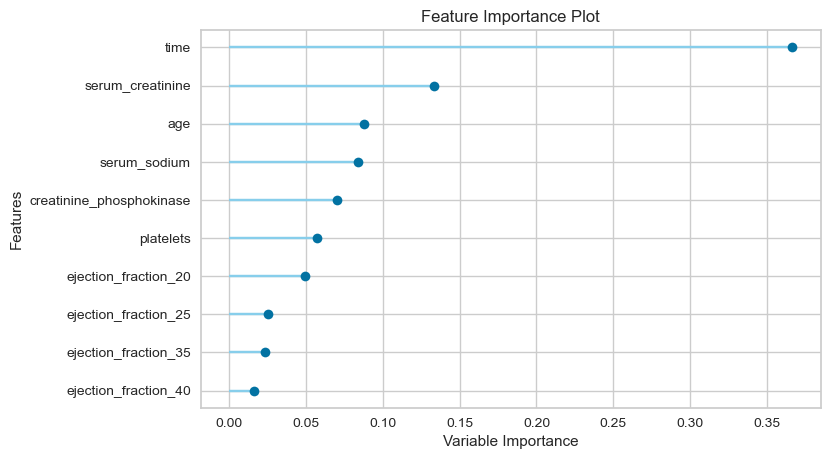

In [54]:
pc.plot_model(Tuned_RF_Op, plot = 'feature')

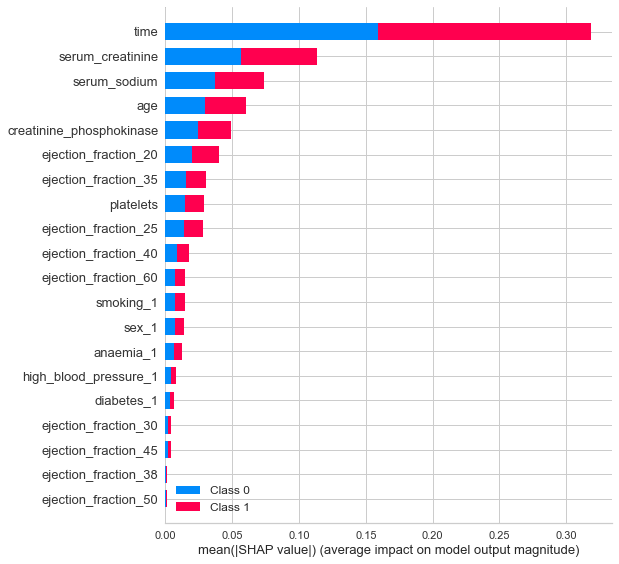

In [42]:
!pip install shap
pc.interpret_model(Tuned_RF_Op)

# Evaluating Catboost

In [46]:
pc.evaluate_model(Tuned_Cat_Op)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

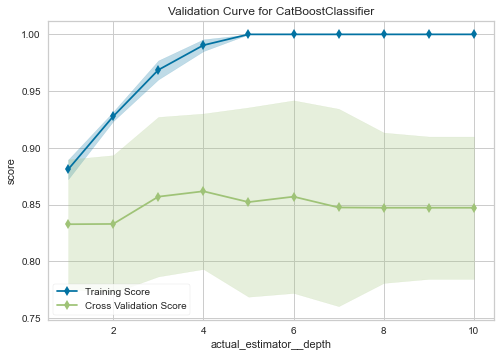

In [50]:
pc.plot_model(Tuned_Cat_Op, plot = 'vc')

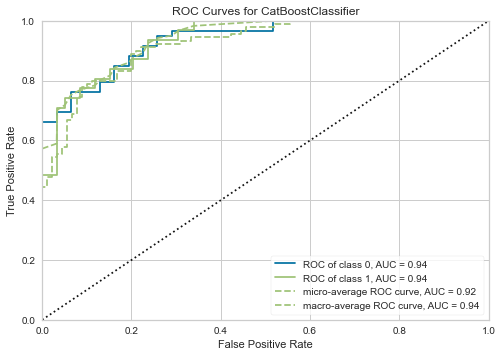

In [44]:
pc.plot_model(Tuned_Cat_Op)

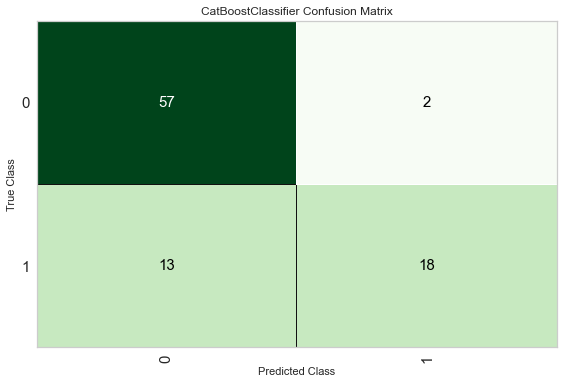

In [47]:
pc.plot_model(Tuned_Cat_Op, plot = 'confusion_matrix')

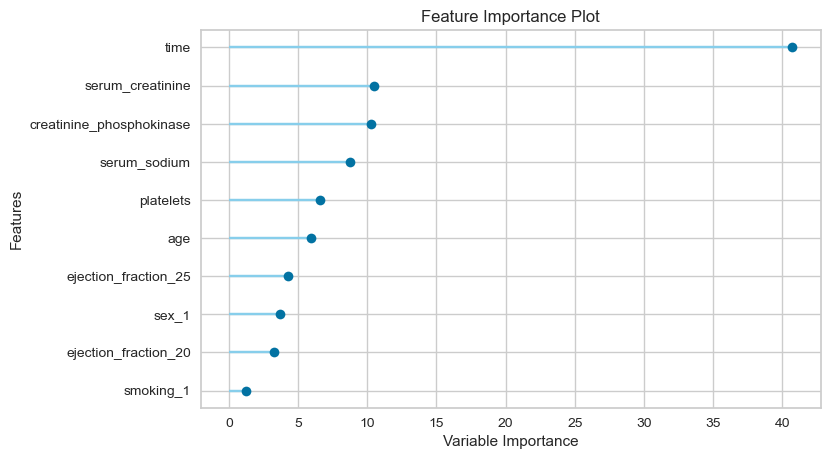

In [55]:
pc.plot_model(Tuned_Cat_Op, plot = 'feature')

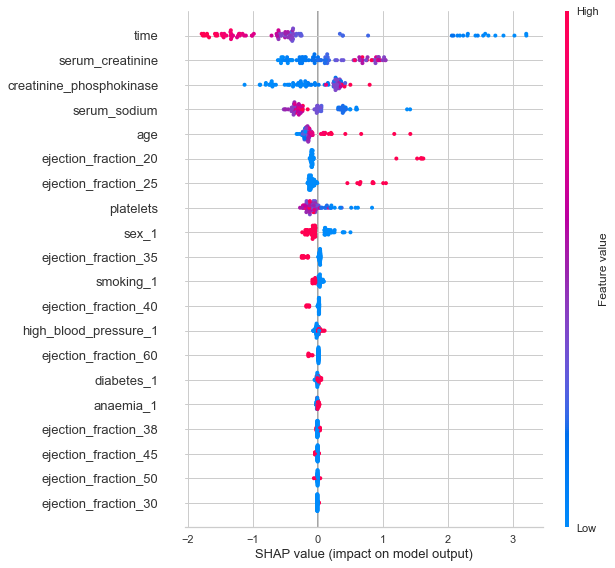

In [53]:
pc.interpret_model(Tuned_Cat_Op)

## Differences
+ It seems the learning and validation curves are different
+ The interpret models with SHAP are somewhat similar but some attributes are flipped around
+ The attribute importances are also flipped around too, with the catboost importances having a higher range compared to RF

# Finalizing Models

In [56]:
Final_RF_Model = pc.finalize_model(Tuned_RF_Op)

In [57]:
PredRF = pc.predict_model(Final_RF_Model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9222,0.9913,0.8710,0.9000,0.8852,0.8264,0.8267


In [58]:
Final_Cat_Model = pc.finalize_model(Tuned_Cat_Op)

In [59]:
PredCat = pc.predict_model(Final_Cat_Model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9667,0.9962,0.9032,1.0000,0.9492,0.9245,0.9271


# Narrative
+ Even when not removing redundant attributes, even when pycaret predicts RF will perform best, Catboost is still superier
+ With an accuracy of 0.9667, while RF accuracy is 0.9222, even with everything else the catboost classifier still scores higher
- However, this mini project of using the same algorithms but with untouched data shows that cleaning data is important
- Looking at the other Pycaret project where age and diabetes is removed, the catboost classifier scores 0.9889
- Morale of the story, dont be quick to use the number 1 algorithm pycaret reccomends, as the one here that ranked 2nd won
- Also, get rid of redundant attributes to have an even higher score.
+ These results were expected coming into this project, but just wanted to see the difference of accuracy score